In [1]:
import pandas as pd 
from numpy import mean
from numpy import std


import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from clean_split_data import clean_data
from clean_split_data import split_data


import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt


### Data 

In [2]:
data = pd.read_csv("data.csv")
data = clean_data(data)
X=data[['radius_mean', 'texture_mean','area_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'smoothness_mean']]
y=data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


### KNN -with selected 7 features 

In [3]:
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
fitted_knn = knn_clf.fit(X_train, y_train)

print("Accuracy of KNN:", fitted_knn.score(X_test, y_test))

Accuracy of KNN: 0.8671328671328671


### Logistic Regression-with selected 7 features 

In [4]:
logistic_regre_clf = LogisticRegression(solver="lbfgs", max_iter=250) 
fitted_logistic_regre_clf = logistic_regre_clf.fit(X_train, y_train)
print("Accuracy of Logistic Regression :", fitted_logistic_regre_clf.score(X_test, y_test))

Accuracy of Logistic Regression : 0.8881118881118881


### Random Forest -with selected 7 features 

In [5]:
random_forest_clf = RandomForestClassifier(n_estimators=4, random_state=42)
fitted_random_forest_clf = random_forest_clf.fit(X_train, y_train)

print("Accuracy of Random Forest):", fitted_random_forest_clf.score(X_test, y_test))

Accuracy of Random Forest): 0.9230769230769231


### Support Vector Machine(rbf) -with selected 7 features 

In [6]:
support_vector_machine_clf = SVC(kernel='rbf', C=10000)
fitted_support_vector_machine_clif = support_vector_machine_clf.fit(X_train, y_train)
print("Accuracy of Support Vector Machine(rbf):", fitted_support_vector_machine_clif.score(X_test, y_test))

Accuracy of Support Vector Machine(rbf): 0.8811188811188811


### Stacking Ensemble -with selected 7 features 

In [7]:
our_trained_data = pd.read_csv("data.csv")
our_trained_data = clean_data(our_trained_data)

x=our_trained_data[['radius_mean', 'texture_mean','area_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'smoothness_mean']]
y=our_trained_data[['diagnosis']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train = x_train.values.tolist()
y_train = y_train.values.tolist()

flattened_y_train = [] 
for sub_list in y_train: 
    for val in sub_list: 
        flattened_y_train.append(val)

X, y = x_train, flattened_y_train


In [8]:
estimators = [
('random_forest', RandomForestClassifier(n_estimators=5, random_state=42)),
('logistic_regr', LogisticRegression(solver="lbfgs", max_iter=1460)),
('knn', KNeighborsClassifier(n_neighbors =5)),
('svm_rbf', SVC(kernel='rbf', gamma=4, C=10000))
]
Stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv = 5)


fitted_Stacking_classifier = Stacking_classifier.fit(X, y)
print("Accuracy of Stacking ensemble:" ,fitted_Stacking_classifier.score(x_test, y_test))


Accuracy of Stacking ensemble: 0.9649122807017544


### Plot to Compare Accuracy 

Text(0.5, 1.0, 'Accuracy score for base models and Stacking ensemble model')

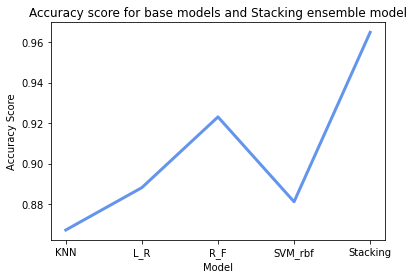

In [12]:
models = ["KNN", "L_R", "R_F", "SVM_rbf", "Stacking"]
accuracy_score = [0.8671328671328671, 0.8881118881118881, 0.9230769230769231, 0.8811188811188811, 0.9649122807017544]
plt.plot(models, accuracy_score, c='cornflowerblue', linewidth=3)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy score for base models and Stacking ensemble model')